In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
drugsim_baseline = pd.read_csv('drug_sim/baseline/LOOCV_cosines.csv')[['left_out_node', 'cosine_to_actual']]
drugsim_baseline.columns = ['drug', 'cosine_sim']
drugsim_baseline['vector_method'] = 'GCN baseline'
drugsim_baseline['neighbourhood_method'] = 'drug similarity'

bipartite_baseline = pd.read_csv('bipartite_gene/baseline/LOOCV_cosines.csv')[['left_out_node', 'cosine_to_actual']]
bipartite_baseline.columns = ['drug', 'cosine_sim']
bipartite_baseline['vector_method'] = 'GCN baseline'
bipartite_baseline['neighbourhood_method'] = 'bipartite projection'

chap4 = pd.read_csv('../../../Chapter4/data/results/cosines_vs_actual.csv')
df = pd.concat([chap4, drugsim_baseline, bipartite_baseline])

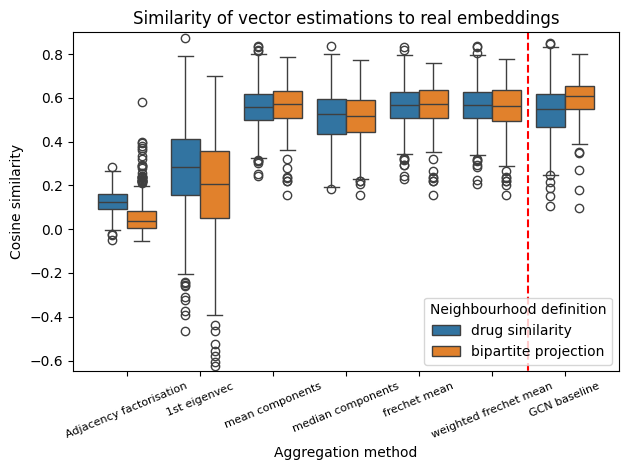

In [24]:
plt.clf()
sns.boxplot(data=df, y='cosine_sim', x='vector_method', hue='neighbourhood_method')
plt.title('Similarity of vector estimations to real embeddings')
plt.ylabel('Cosine similarity')
plt.xlabel('Aggregation method')
plt.legend(title='Neighbourhood definition', loc='lower right')
plt.xticks(size=8, rotation=22.5)
plt.ylim(-0.65, 0.9)
plt.tight_layout()
plt.vlines(x=5.5, ymin=-1, ymax=1.0, colors='red', linestyles='dashed')
plt.savefig('cosines_vs_chap4.png')